# House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features

### Dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### All the Lifecycle in a Data Science Project 

1. Data Analysis
2. Feature Engineering
3. Feature Selection 
4. Model Building 
5. Model Deployment

In [138]:
## Data Analysis Phase - Getting to know more about data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Displaying all coulumns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

In [139]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [141]:
print(dataset.shape)

(1460, 81)


### In Data Analysis we will analyze to find out: 
1. Missing Values
2. All the Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [142]:
## Checking the presence of missing values in each feature
## 1 - Making a list of features with missing values
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2 - Printing the name and percentage of missing values
for features in features_with_na:
    print("{}: {}% missing values".format(features, np.round(dataset[features].isnull().mean(), 4)))

LotFrontage: 0.1774% missing values
Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
MasVnrArea: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageYrBlt: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [143]:
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#### Due to the presence of many missing values we need to find the relationship between the missing values and Sales Price

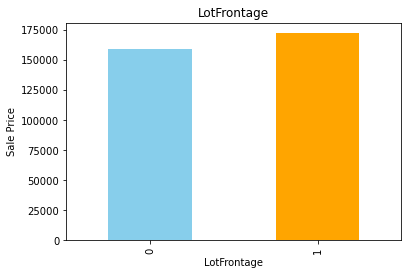

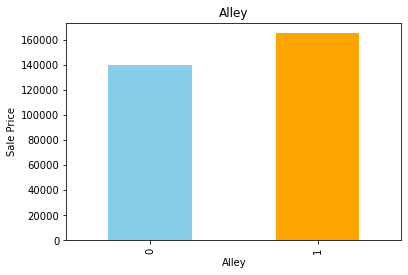

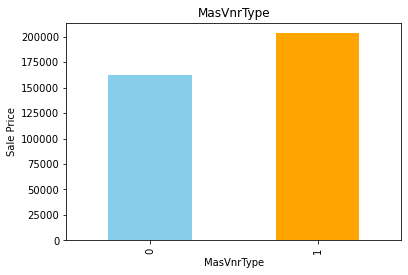

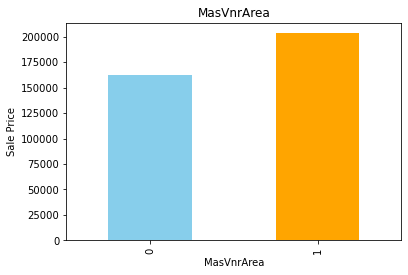

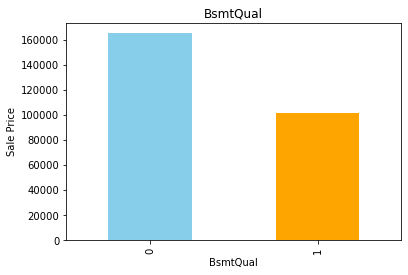

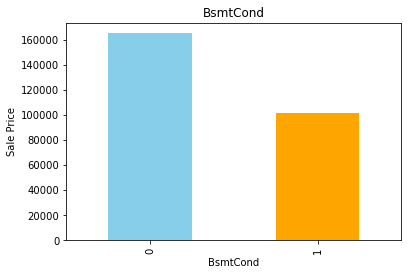

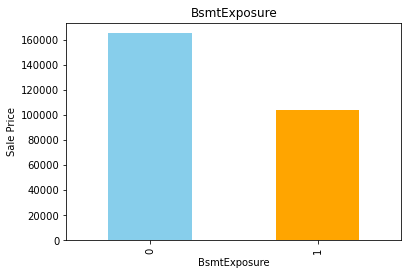

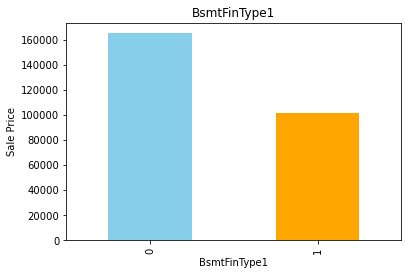

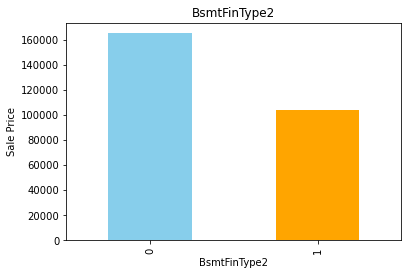

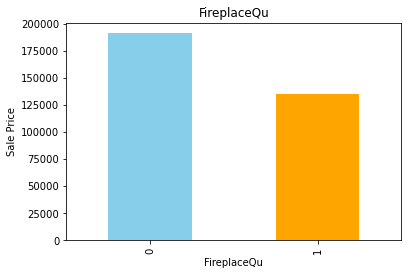

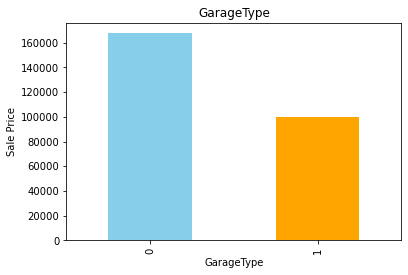

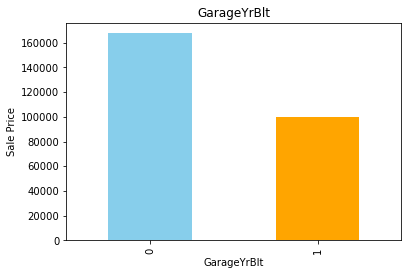

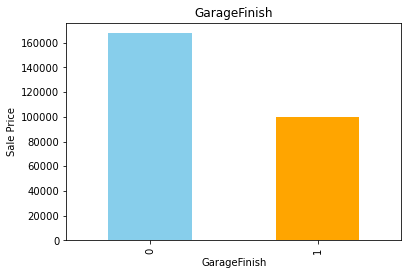

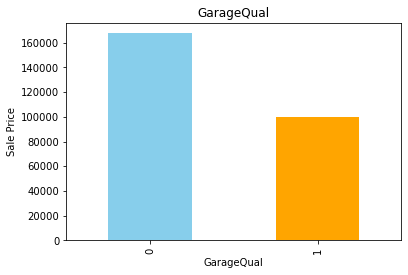

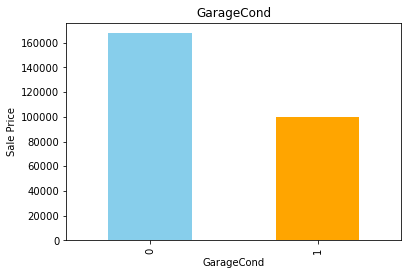

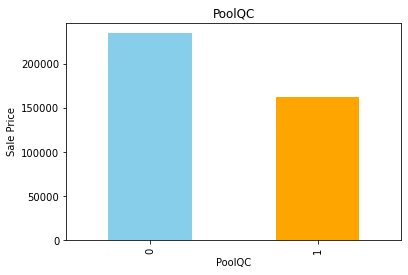

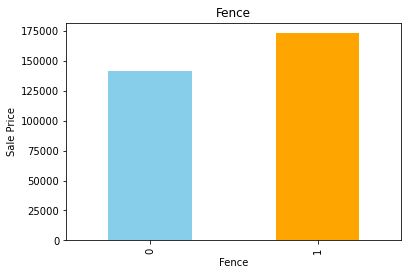

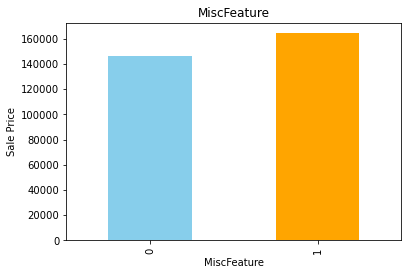

In [144]:
for features in features_with_na:
    data = dataset.copy()
    
    ## Creating a variable which indicates 1 if observation has a missing value otherwise 0
    data[features] = np.where(data[features].isnull(), 1,0)
    
    ## Calculating median SalesPrice where information is missing or present 
    data.groupby(features)['SalePrice'].median().plot.bar(color=['skyblue', 'orange'])
    plt.title(features)
    plt.ylabel("Sale Price")
    plt.show()

#### Here the relationship between the missing values and the dependent variable is clearly visible. So we need to replace the null values with something so as to continue our sale price prediction.

In [145]:
 print("ID of houses {}".format(len(dataset.Id)))

ID of houses 1460


In [146]:
## List of Numerical Variables
numerial_features = [features for features in dataset.columns if dataset[features].dtypes != 'O']

print("Number of numerical variables {}".format(len(numerial_features)))

## Printing the Numerical Variables
dataset[numerial_features].head()

Number of numerical variables 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(DataTime Variables)

From the dataset we have 4 year Variables. We have to extract the number of days from them. One example in this scenario can be difference in years between the year of built and the year it was sold.

In [147]:
## List of variables that contain year feature
year_feature = [features for features in numerial_features if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [148]:
## Exploring the content of these variables
for features in year_feature:
    print(features, dataset[features].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

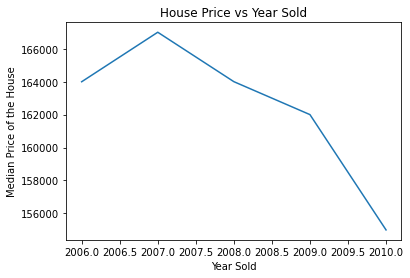

In [149]:
## Analyzing the temporal Datetime Variables
## Checking the relationship between the year in which the houses were sold and the Sales Price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median Price of the House")
plt.title("House Price vs Year Sold")

In [150]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

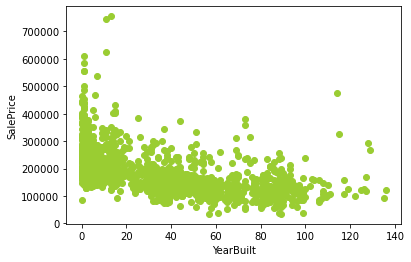

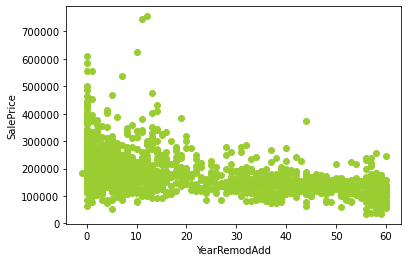

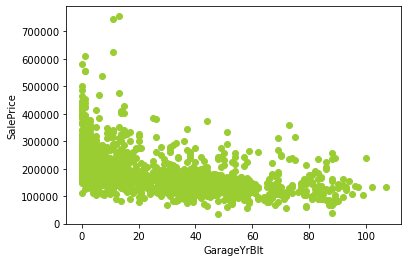

In [151]:
## Now we will compare the difference between all year feature with SalePrice

for features in year_feature:
    if features != 'YrSold':
        data = dataset.copy()
        ## We will need to record the difference
        data[features] = data['YrSold'] - data[features]
        
        plt.scatter(data[features], data['SalePrice'], color='yellowgreen')
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

#### Discrete Variables

In [152]:
## Continuous Variables and Discrete Variables

discrete_features = [features for features in numerial_features if len(dataset[features].unique())<25 and features not in year_feature+['Id']]
print("Discrete Variables count: {}".format(len(discrete_features)))

Discrete Variables count: 17


In [153]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [154]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


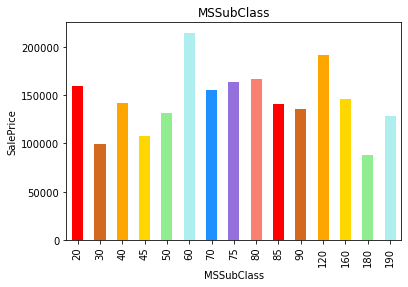

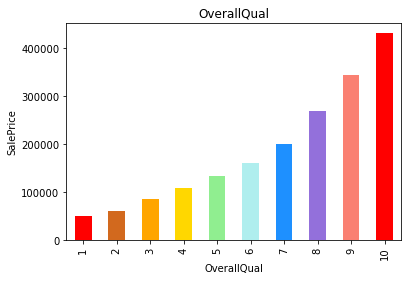

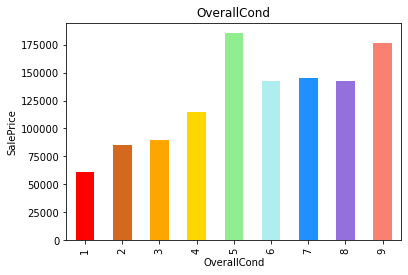

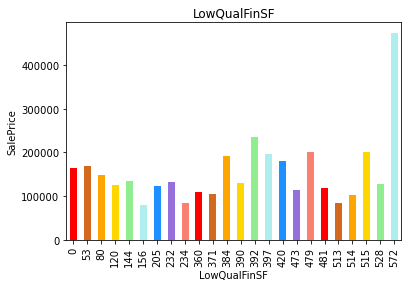

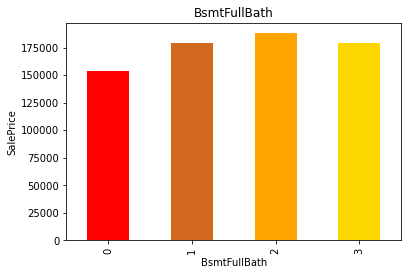

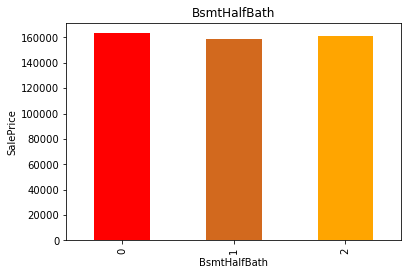

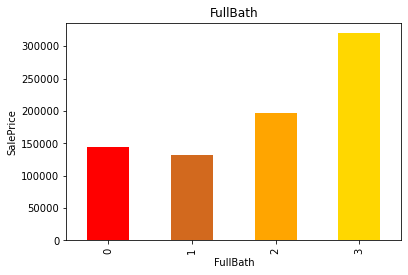

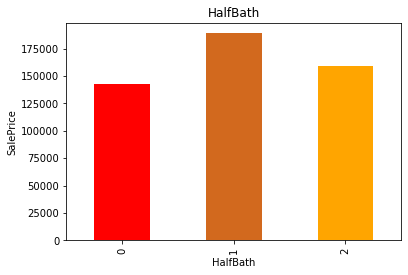

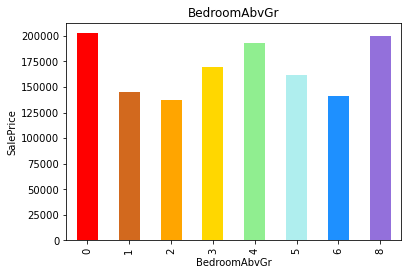

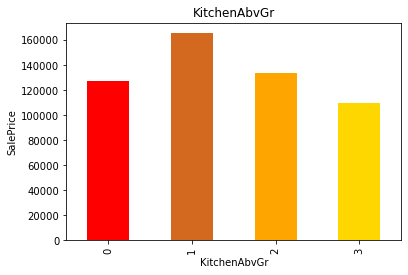

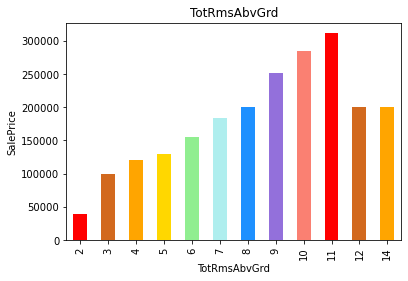

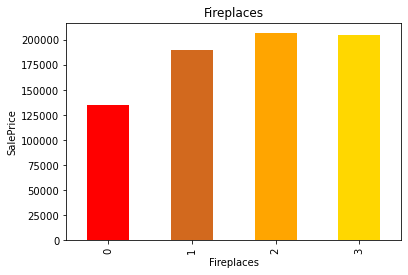

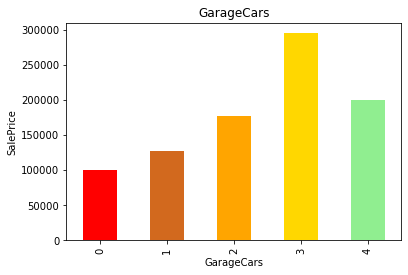

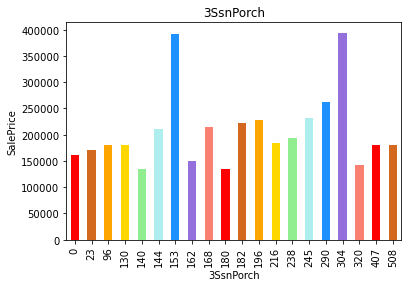

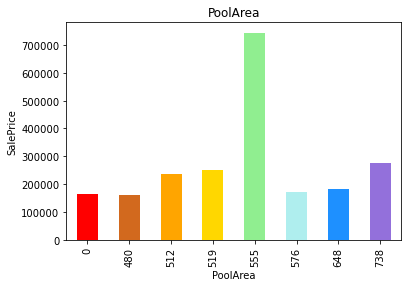

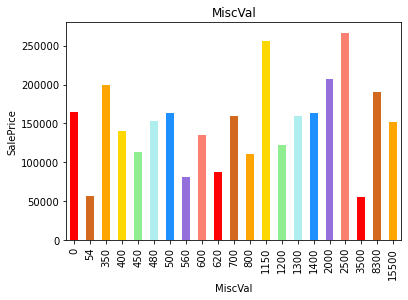

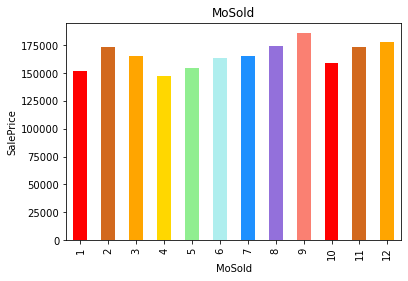

In [155]:
## Relationship between Discrete Variables and Sale Price

for features in discrete_features:
    data = dataset.copy()
    data.groupby(features)['SalePrice'].median().plot.bar(color = ['red', 'chocolate', 'orange', 'gold', 'lightgreen', 'paleturquoise', 'dodgerblue', 'mediumpurple', 'salmon'])
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

 #### Continuous Variables

In [156]:
continuous_feature = [features for features in numerial_features if features not in discrete_features+year_feature+['Id']]
print("Continuous Variables Count: {}".format(len(continuous_feature)))

Continuous Variables Count: 16


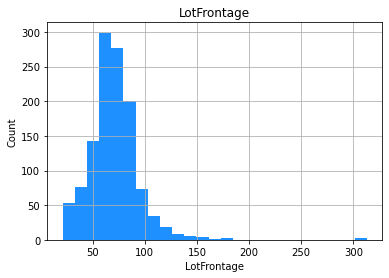

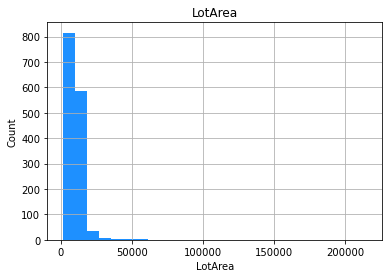

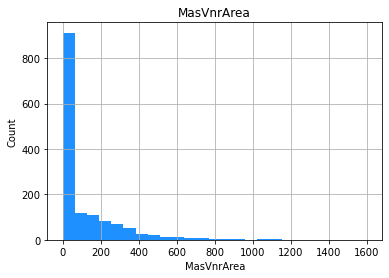

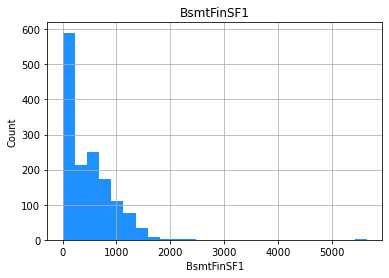

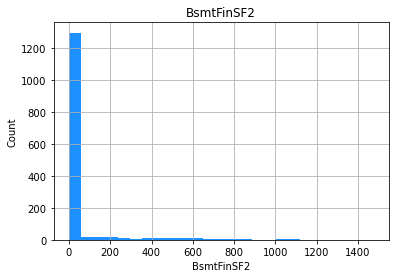

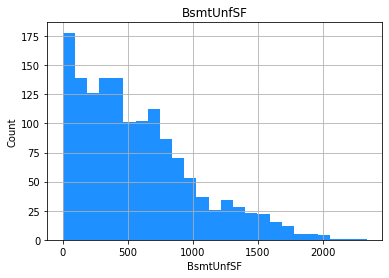

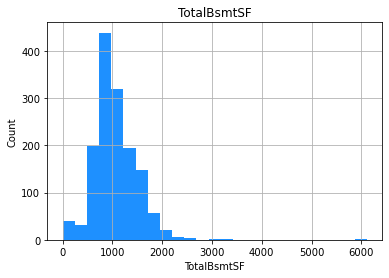

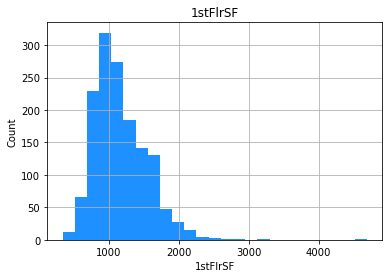

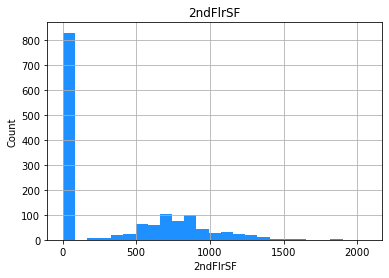

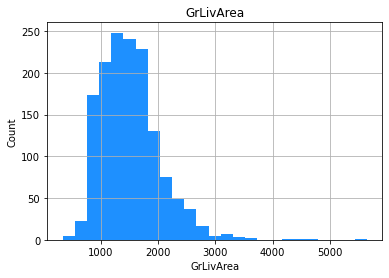

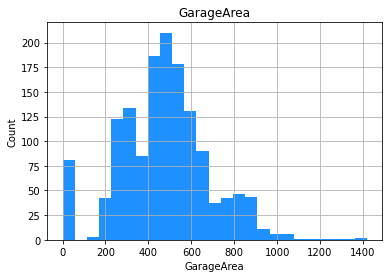

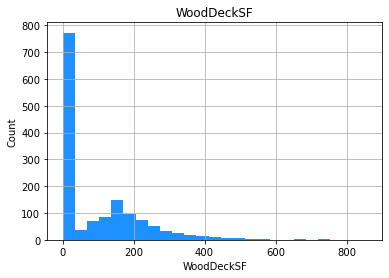

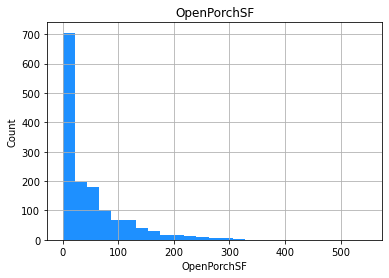

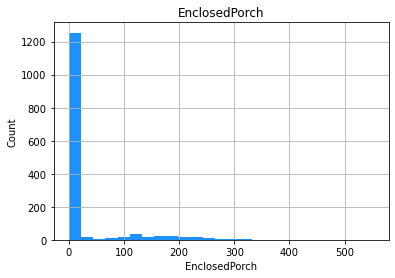

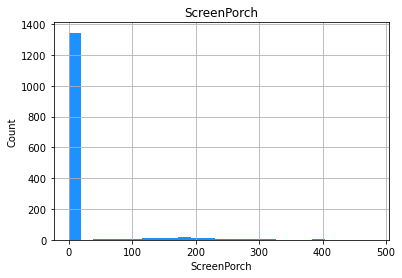

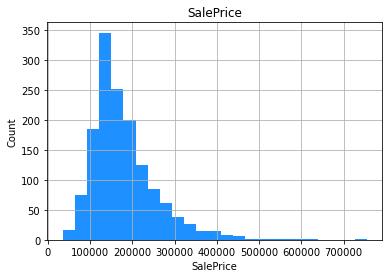

In [157]:
for features in continuous_feature:
    data = dataset.copy()
    data[features].hist(bins=25, color='dodgerblue')
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

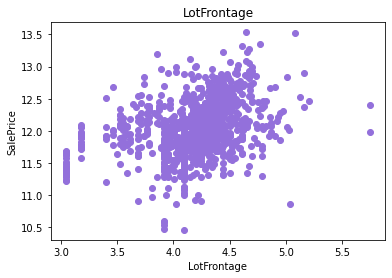

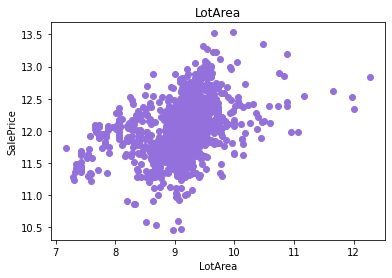

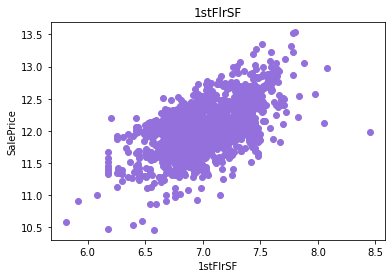

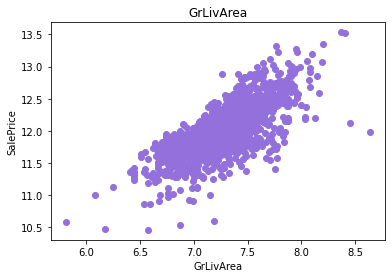

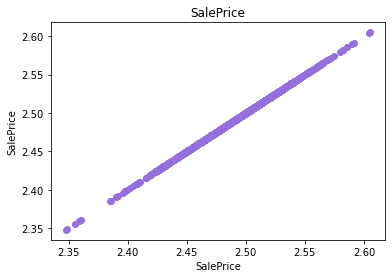

In [158]:
## We will be using Logarithmic transformation
## if we don't use '.copy()' then whatever changes are made in data it will be mapped to dataset

for features in continuous_feature:
    data=dataset.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[features], data['SalePrice'], color='mediumpurple')
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title(features)
        plt.show()

### Outliers

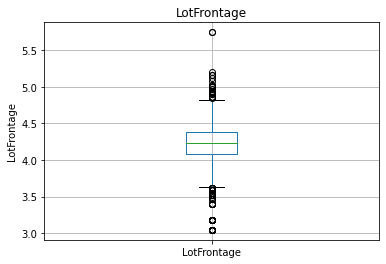

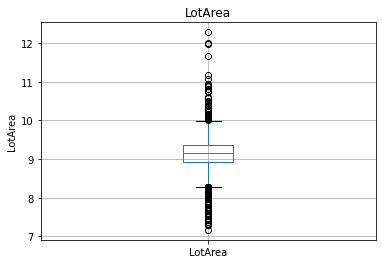

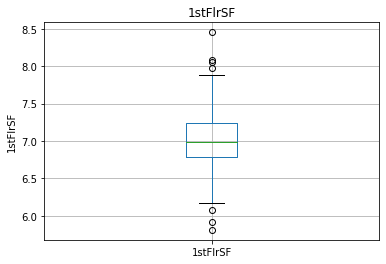

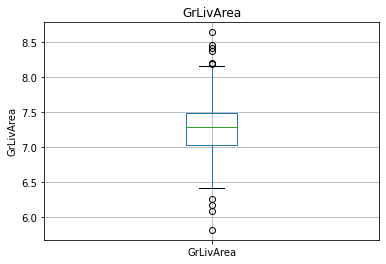

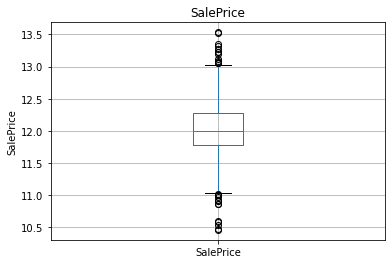

In [159]:
for features in continuous_feature:
    data=dataset.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

### Categorical Variables

In [160]:
categorical_features = [features for features in dataset.columns if data[features].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [161]:
dataset[categorical_features].head() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [162]:
for features in categorical_features:
    print("The feature is {} and the number of categories are {}".format(features, len(dataset[features].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

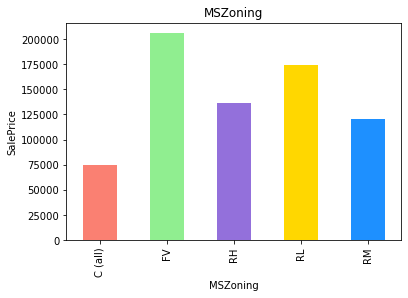

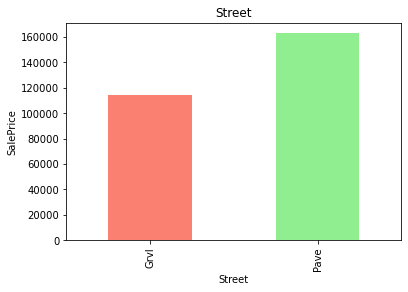

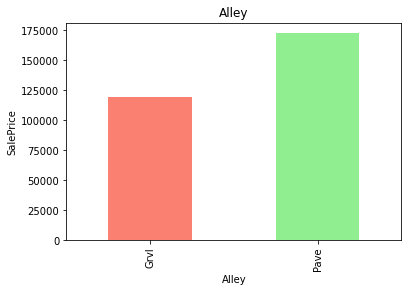

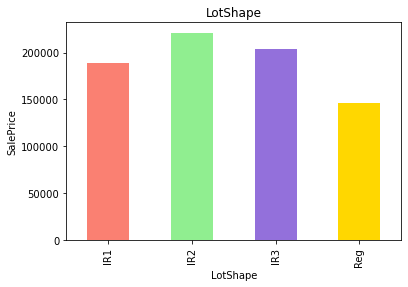

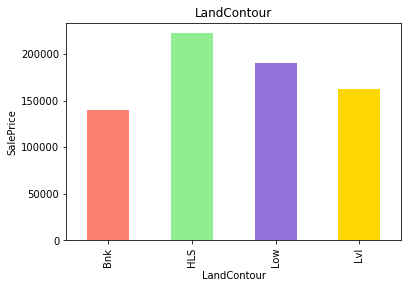

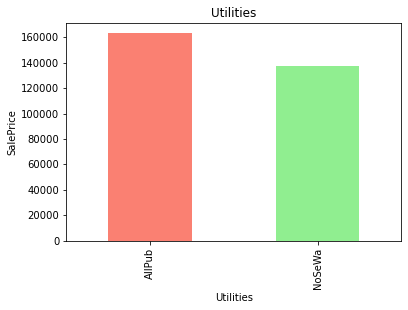

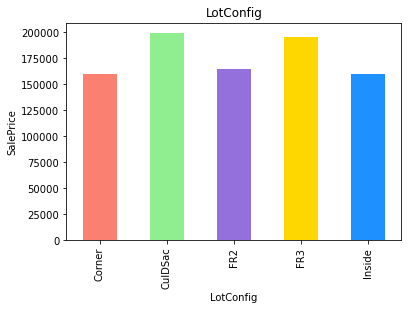

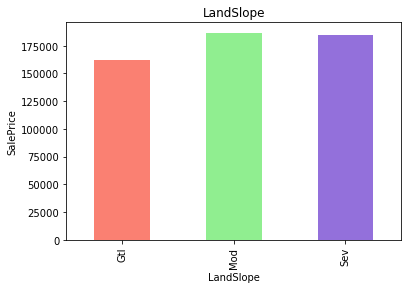

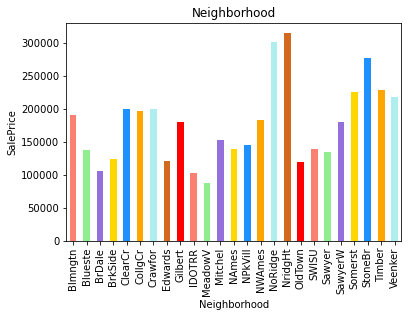

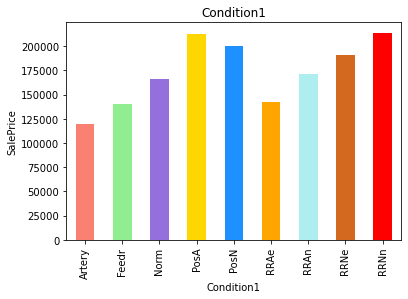

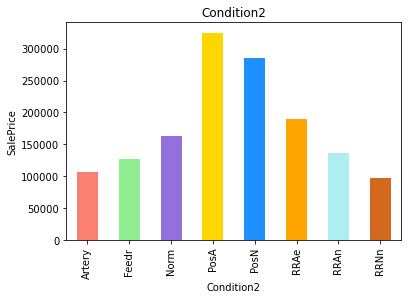

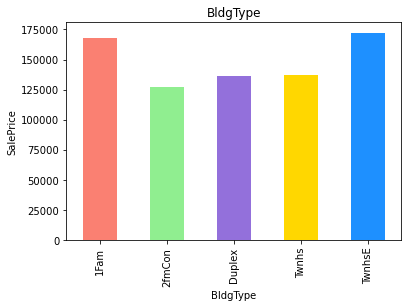

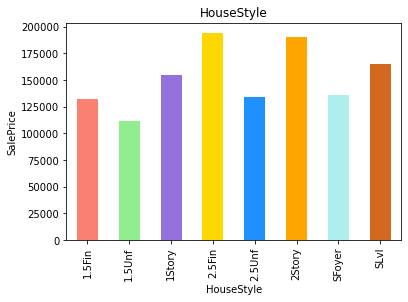

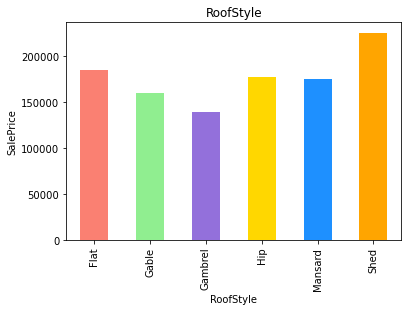

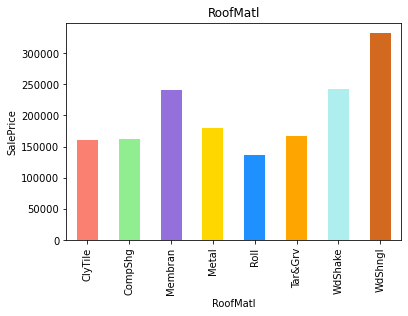

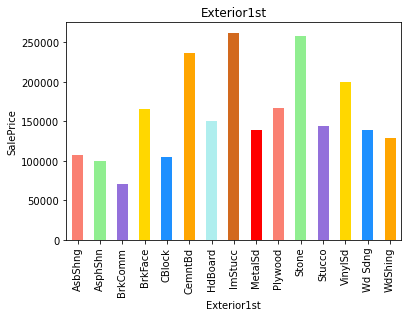

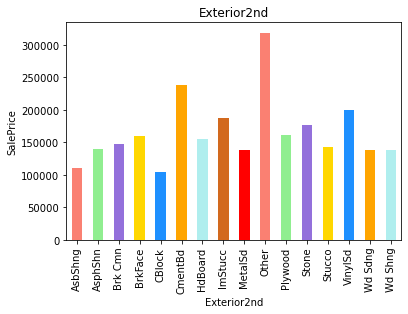

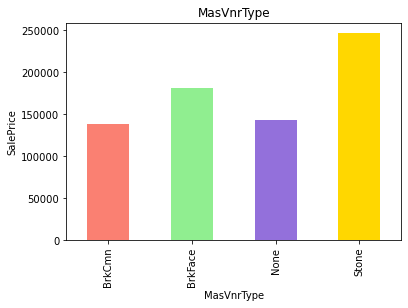

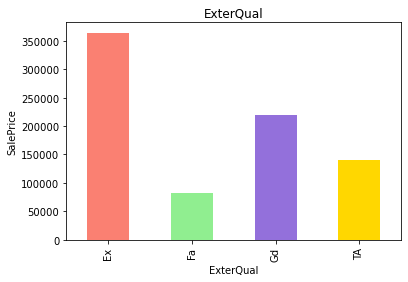

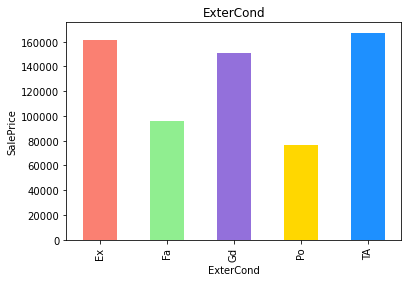

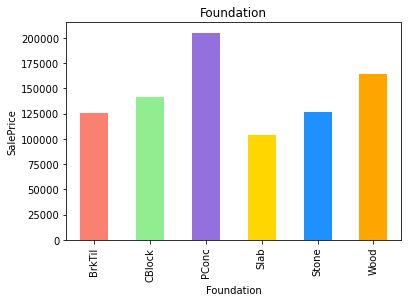

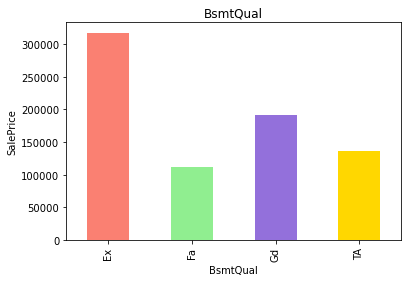

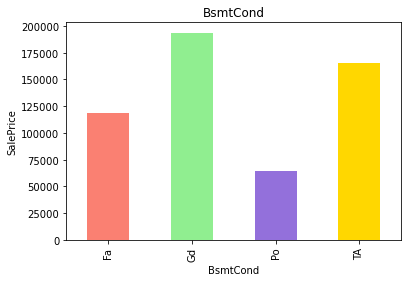

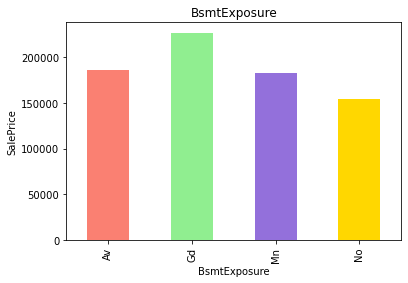

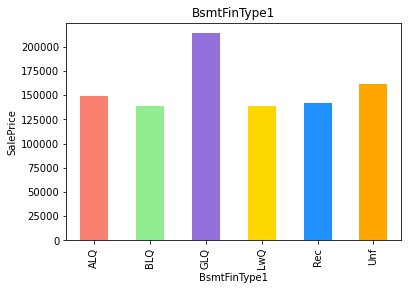

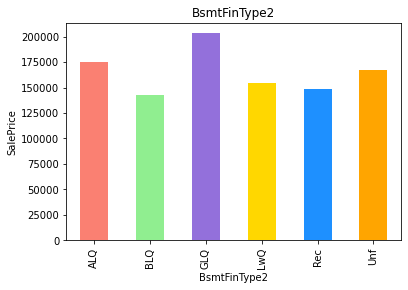

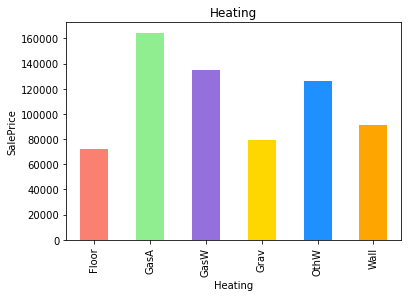

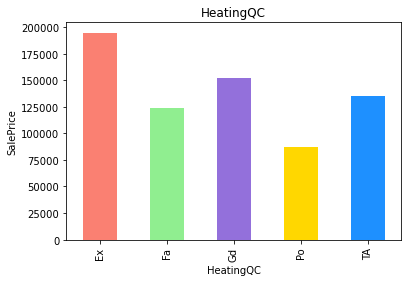

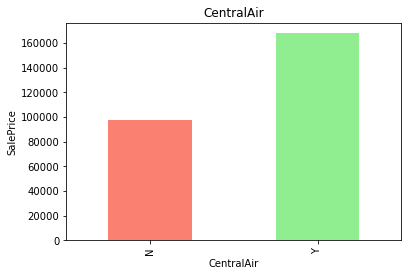

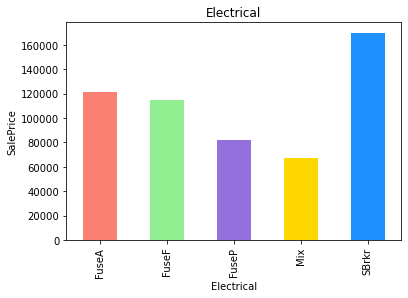

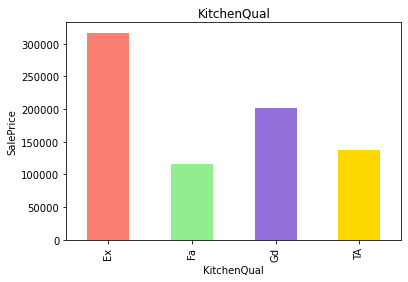

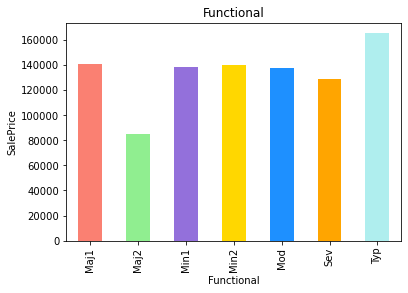

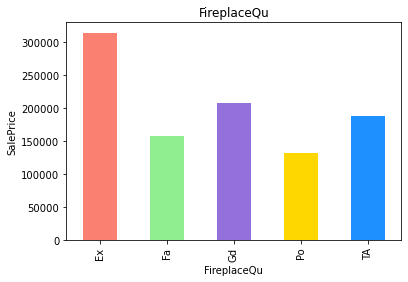

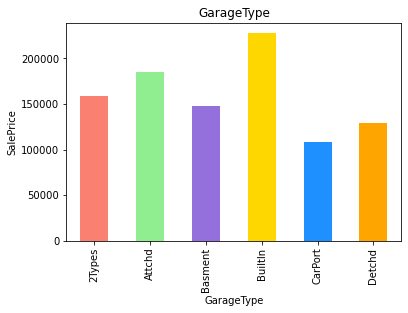

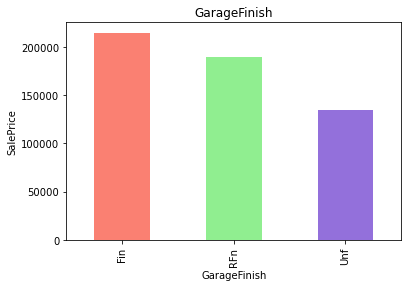

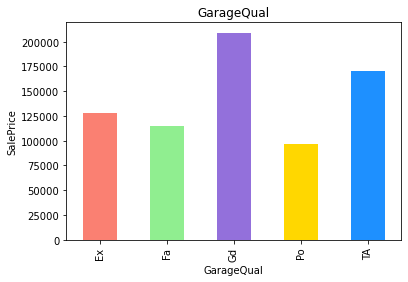

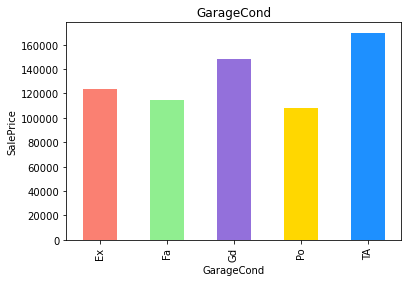

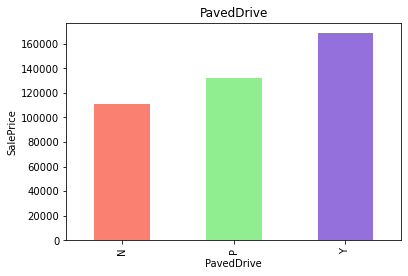

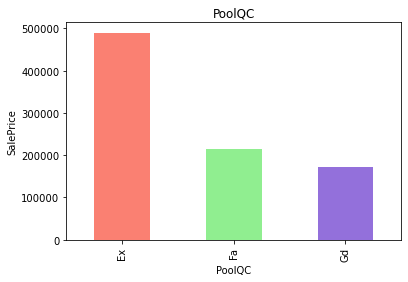

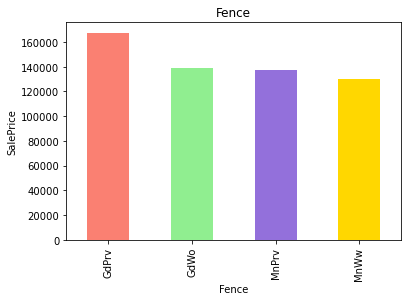

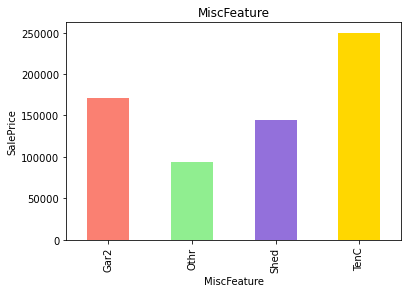

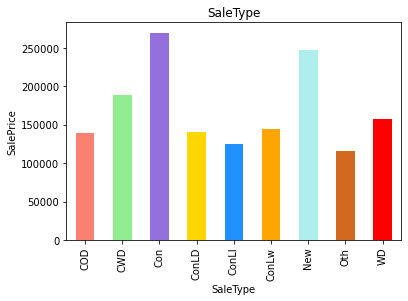

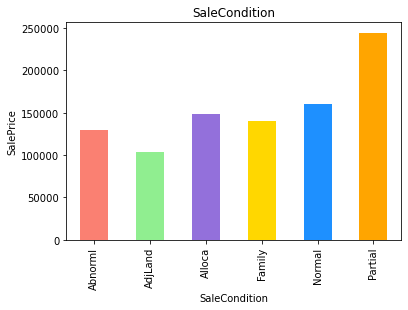

In [163]:
for features in categorical_features:
    data=dataset.copy()
    data.groupby(features)['SalePrice'].median().plot.bar(color = ['salmon', 'lightgreen', 'mediumpurple', 'gold', 'dodgerblue', 'orange', 'paleturquoise', 'chocolate', 'red'])
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

### Replacing Missing Values - Category Features

In [164]:
## Checking the presence of missing values in categorical variables
## 1 - Making a list of features with missing values
features_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>1 and dataset[features].dtype=='O']

## 2 - Printing the name and percentage of missing values
for features in features_nan:
    print("{}: {}% missing values".format(features, np.round(dataset[features].isnull().mean(), 4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [165]:
## Replacing missing values with a new label

def replace_cat_feature(dataset, features_nan):
    data=dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data

dataset = replace_cat_feature(dataset, features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [166]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


### Replacing Missing Values - Numerical

In [167]:
## Checking the presence of missing values in numerical variables
## 1 - Making a list of features with missing values
numerical_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>1 and dataset[features].dtype!='O']

## 2 - Printing the name and percentage of missing values
for features in numerical_with_nan:
    print("{}: {}% missing values".format(features, np.round(dataset[features].isnull().mean(), 4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


In [168]:
## Replacing the numerical missing values

for features in numerical_with_nan:
    ## We will replace the missing values with median since there are outliers
    median_value = dataset[features].median()
    
    ## Creating a new feature to capture nan values
    dataset[features+'nan'] = np.where(dataset[features].isnull(),1,0)
    dataset[features].fillna(median_value, inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [169]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

### Replacing Missing Values - Temporal Variables

In [170]:
## Temporal variables - Date Time Variables

for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[features] = dataset['YrSold'] - dataset[features]
    
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


### Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution 

In [171]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for features in num_features:
    dataset[features]=np.log(dataset[features])

In [172]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Handling Rare Categorical Features
We will remove variables that are present less than 1% of the observations 

In [173]:
categorical_features = [features for features in dataset.columns if dataset[features].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [174]:
for features in categorical_features:
    temp = dataset.groupby(features)['SalePrice'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
    dataset[features] = np.where(dataset[features].isin(temp_df), dataset[features], 'Rare_var')

In [175]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Changing Categorical Variables to Labeled Numerals

In [176]:
for features in categorical_features:
    labels_ordered = dataset.groupby(features)['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dataset[features] = dataset[features].map(labels_ordered)

In [177]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,0,0,9,2,1,3,1,5,5,16,14,0,0,10,10,1,0.0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,1,5,4,0,1,4,16.0,1,2,480,2,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,0,0,18,2,1,3,3,8,5,3,2,0,0,10,10,4,186.0,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,4,4,3.0,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,1,0,12,5,1,3,5,7,6,36,36,0,0,6,5,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,1,7,4,2,3,4,36.0,2,2,484,2,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,0,0,8,4,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,1,8,3,2,3,2,77.0,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,1,0,3,0,0,0,2,5,6,69,58,0,0,4,3,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,1,5,4,2,3,4,69.0,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0


In [178]:
scaling_feature = [features for features in dataset.columns if features not in ['Id', 'SalePrice']]
len(scaling_feature)

82

In [180]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [181]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


### Feature Scaling

In [182]:
features_scale = [features for features in dataset.columns if features not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[features_scale])

MinMaxScaler()

In [183]:
scaler.transform(dataset[features_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [184]:
dataset = pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(dataset[features_scale]), columns=features_scale)], axis=1)

In [185]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


## Feature Selection Advanced House Price Prediction

The main aim of this project it to predict the house price based on various features

In [187]:
## Always remember there is always a chance of data leakage, hence we need to split the data into train and test data and then apply Feature Engineering

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['SalePrice'], test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((1314, 84), (146, 84))

In [188]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [190]:
## drop dependent feature from dataset
X_train=X_train.drop(['Id','SalePrice'],axis=1)

In [191]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) ## Setting the seed and random state 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [192]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [193]:
## Printing the number of total and seected features

selected_feat = X_train.columns[(feature_sel_model.get_support())]

## Printing the Stats
print("Total features: {}".format((X_train.shape[1])))
print("Selected Features: {}".format(len(selected_feat)))
print("Features with coefficients shrank to zero: {}".format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

Total features: 82
Selected Features: 22
Features with coefficients shrank to zero: 60


In [194]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

In [195]:
X_train = X_train[selected_feat]

In [196]:
X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
930,0.000000,0.75,0.863636,0.777778,0.50,0.049180,0.0,0.75,0.75,1.00,1.0,0.559760,0.523250,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0,0.75
656,0.000000,0.75,0.363636,0.444444,0.75,0.049180,0.0,0.50,0.25,1.00,1.0,0.434539,0.406196,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0,0.75
45,0.588235,0.75,0.954545,0.888889,0.50,0.098361,1.0,1.00,0.25,1.00,1.0,0.627205,0.586296,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75
1348,0.000000,0.75,0.454545,0.666667,0.50,0.163934,0.0,0.75,1.00,1.00,1.0,0.566920,0.529943,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.75
55,0.000000,0.75,0.363636,0.555556,0.50,0.737705,0.0,0.50,0.25,0.75,1.0,0.549026,0.513216,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75


In [197]:
X_test = X_test[selected_feat]
X_test.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
529,0.000000,0.75,0.727273,0.555556,0.250,0.540984,1.0,0.50,0.25,0.5,1.0,0.764014,0.714182,0.333333,0.333333,0.666667,0.6,0.8,0.666667,0.50,1.0,0.25
491,0.176471,0.75,0.363636,0.555556,0.750,0.934426,0.0,0.50,0.25,0.5,1.0,0.398758,0.549294,0.333333,0.000000,0.666667,0.6,0.8,0.333333,0.25,1.0,0.75
459,0.176471,0.75,0.136364,0.444444,0.375,0.983607,0.0,0.50,0.25,0.5,1.0,0.406964,0.453307,0.333333,0.666667,0.333333,0.6,0.4,0.333333,0.25,1.0,0.75
279,0.235294,0.75,0.772727,0.666667,0.500,0.524590,1.0,0.75,0.25,1.0,1.0,0.469855,0.636999,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0,0.75
655,0.823529,0.25,0.090909,0.555556,0.500,0.655738,0.0,0.50,0.25,0.5,1.0,0.171149,0.419061,0.000000,0.333333,0.000000,0.2,0.4,0.333333,0.25,1.0,0.50


In [198]:
model = Lasso(alpha=0.005, random_state=0)
model.fit(X_test,y_test)

Lasso(alpha=0.005, random_state=0)

In [199]:
predictor = model.predict(X_test)
predictor

array([12.23548534, 11.85708494, 11.76361296, 12.30135611, 11.65886216,
       11.66709832, 12.36605264, 11.83462418, 13.00012921, 12.01115088,
       12.21132327, 11.88505231, 12.30560147, 11.77319187, 11.80134988,
       11.86179022, 12.34525048, 11.62987073, 11.84216797, 12.10453707,
       11.80983151, 12.07254788, 11.64241568, 12.0985541 , 12.15594613,
       12.1157308 , 12.04953172, 11.3425203 , 12.46395977, 11.74578581,
       11.88710176, 12.15475586, 11.91929345, 12.52524466, 12.57208292,
       12.14480006, 12.52682127, 11.7611412 , 12.39319653, 12.57861164,
       12.14370219, 11.79764127, 12.27879105, 12.53868892, 12.64730175,
       11.82399575, 11.68401784, 11.82542126, 11.99945595, 11.56848291,
       12.79191762, 11.84635132, 12.03543678, 11.42376011, 12.29371361,
       11.6905921 , 11.73590112, 12.37131156, 11.74572733, 11.59928512,
       12.00134608, 11.76749705, 11.86845776, 11.90135875, 12.13965025,
       12.00845332, 11.76525913, 12.35646063, 11.87502112, 12.36

In [200]:
model.score(X_test,y_test)

0.8772068917824595